# Projeto Ciência de Dados - Previsão de Vendas

O objetivo é conseguir prever as vendas que vamos ter em determinado período com base nos investimentos e gastos em anúncios nas 3 grandes redes que a empresa Hashtag investe: TV, Jornal e Rádio

### Passo a Passo de um Projeto de Ciência de Dados

- Passo 1: Entendimento do Desafio
- Passo 2: Entendimento da Área/Empresa
- Passo 3: Extração/Obtenção de Dados
- Passo 4: Ajuste de Dados (Tratamento/Limpeza)
- Passo 5: Análise Exploratória
- Passo 6: Modelagem + Algoritmos (Aqui que entra a Inteligência Artificial, se necessário)
- Passo 7: Interpretação de Resultados

#### Importar a Base de dados

In [3]:
import pandas as pd

df = pd.read_csv("advertising.csv")
#display(df) ###exibe os dados 
df.head()

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


TV        29408.5
Radio      4652.8
Jornal     6110.8
dtype: float64


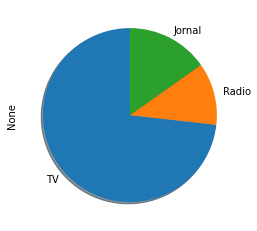

In [61]:
print(df[["TV", "Radio", "Jornal"]].sum())

df[["TV", "Radio", "Jornal"]].sum().plot.pie(startangle = 90, shadow = True ) 


In [64]:
print(df.describe())


df.info()
# mostra os detalhes do dataframe
# usamos esse metodo para verificar se ha inconsistencias, dados indesejados, falta de dados, etc
# Dtype mostra os tipos de dados encontrados em cada uma das 4 colunas
# Non-Null Count mostra se ha dados nulos
# nesse df tem 200 non-null, logo nao tem dados nulos, ja que o df possui 200 linhas

               TV       Radio      Jornal      Vendas
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Radio   200 non-null    float64
 2   Jornal  200 non-null    float64
 3   Vendas  200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


#### Análise Exploratória
- Vamos tentar visualizar como as informações de cada item estão distribuídas
- Vamos ver a correlação entre cada um dos itens

- Importamos duas bibliotecas pois o python ja é integrado com o matplotlib
- mas seus graficos sao muito simples, entao unimos as duas bibliotecas
- vamos criar um gráfico via Seaborn e exibi-lo via matplotlib


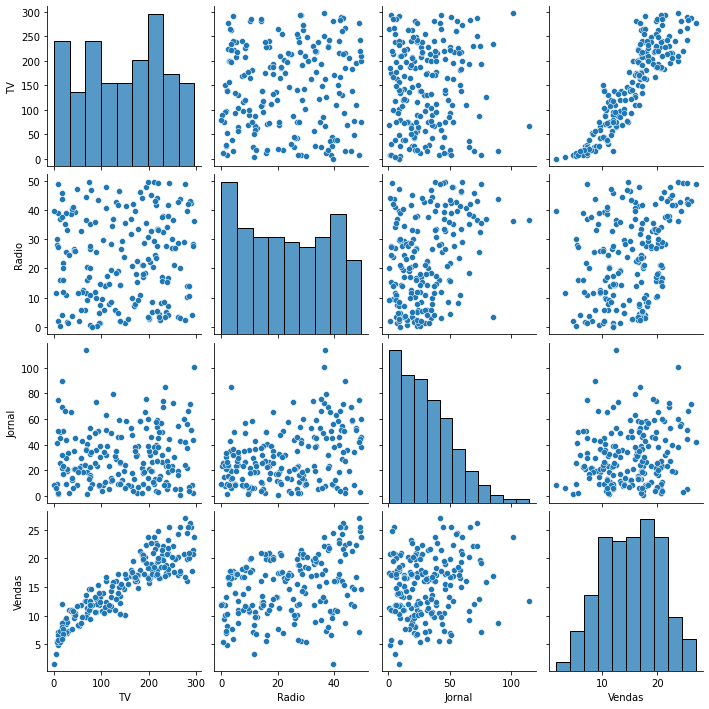

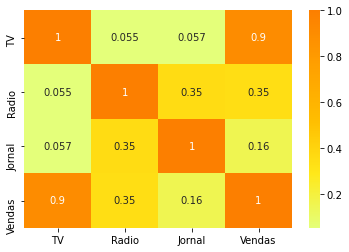

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df)
plt.show()

# cmap indica a paleta de cores, annot se os numeros devem ficar dentro dos quadrados
sns.heatmap(df.corr(), cmap ='Wistia', annot =True)
plt.show()

##### Observações 

- Comparando os dois graficos notamos que mostram resultados parecidos. 
- No mapa de correlaçao quanto mais alaranjado mais as variaveis possuem correlaçao o que também pode ser percebido no grafico de dispersão nos respectivos quadrados.
- enquanto estamos fazendo uma anáçise exploratória estamos mais buscando caminhos do que grandes conclusões
- No gráfico TV X VENDAS, conseguimos ver que há uma proporcionalidade no investimento e o aumento das vendas
- porém no gráfico RADIO X VENDAS, a proporcionalidade e a relação não é clara. Pois enquanto o investimento é quase nulo tem muita amplitude dos dados de venda
- ou seja, as vendas tendem a existir com alto ou baixo investimento nos anúncios de rádio

### Criando base de dados para modelo

O que precisamos identificar são:
- Os inputs do modelo (eixo X);
- Os outputs do modelo (eixo Y);

O objetivo é criar um modelo de previsão de vendas baseado nos dados de investimento nos diferentes canais (TV, radio, jornais)

#### Com isso, podemos partir para a preparação dos dados para treinarmos o Modelo de Machine Learning

In [7]:
from sklearn.model_selection import train_test_split
# train_test_split separa os dados de treino e dados de teste

x = df.drop('Vendas', axis=1)
#drop exclui a coluna vendas, logo  todo o dataframe exceto a coluna vendas fara parte do input (valor do eixo X)
y = df['Vendas']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=1)
#retorna diversos valores que sao desestruturados nas 4 vars

#### Temos um problema de regressão - Vamos escolher os modelos que vamos usar:

- Regressão Linear
- RandomForest (Árvore de Decisão)

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import numpy as np

# treino AI
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

rf_reg = RandomForestRegressor()
rf_reg.fit(x_train, y_train) 

RandomForestRegressor()

Feito o treino, agora precisamos iniciar os testes

#### Teste da AI e Avaliação do Melhor Modelo

- Vamos usar o R² -> diz o % que o nosso modelo consegue explicar o que acontece
- Também vamos olhar o MSE (Erro Quadrático Médio) -> diz o quanto o nosso modelo "erra" quando tenta fazer uma previsão

In [9]:
# teste AI
test_pred_lin = lin_reg.predict(x_test)
test_pred_rf = rf_reg.predict(x_test)

r2_lin = metrics.r2_score(y_test, test_pred_lin)
mse_lin = metrics.mean_squared_error(y_test, test_pred_lin)
print(f"R² da Regressão Linear: {r2_lin}")
print(f"MSE da Regressão Linear: {mse_lin}")
r2_rf= metrics.r2_score(y_test, test_pred_rf)
mse_rf = metrics.mean_squared_error(y_test, test_pred_rf)
print(f"R² do Random Forest: {r2_rf}")
print(f"MSE do Random Forest: {mse_rf}")

R² da Regressão Linear: 0.9071151423684273
MSE da Regressão Linear: 2.3706599712256575
R² do Random Forest: 0.9619956515606449
MSE do Random Forest: 0.9699685166666699


#### Interpretação dos resultados Análise Gráfica

O gráfico abaixo mostra todos os 60 pontos de teste
que são dados reais extraídos da nossa base ao lado
das duas curvas geradas pelos nossos modelos.
- A linha azul representa os dados reais de teste;
- A linha tracejada laranja representa os dados de previsão calculados pelo modelo de Random Forest
- A linha verde tracejada representa os dados de previsão calculados pelo modelo de Regressão Linear

#### Visualização Gráfica das Previsões

Após a elaboração dos testes, utilizamos
novamente o Pandas para criar um dataframe apenas
com os resultados calculados e os dados de teste

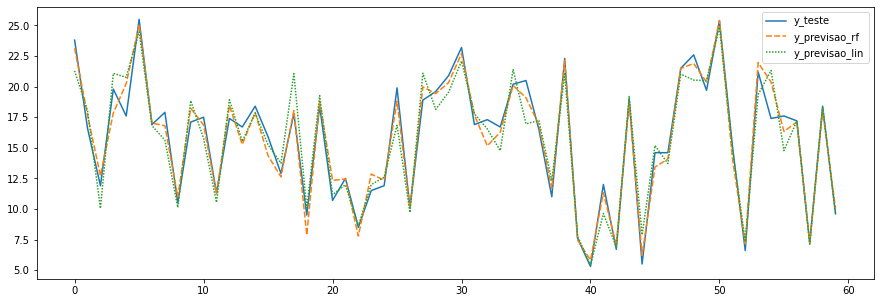

,y_teste,y_previsao_rf,y_previsao_lin
0,23.8,23.140,21.288161
1,16.6,17.684,18.042132
2,11.9,12.714,10.059590
3,19.8,17.844,21.082241
4,17.6,20.243,20.764760
5,25.5,25.064,24.471874
6,16.9,17.023,16.806436
7,17.9,16.804,15.628857
8,10.5,10.976,10.124799
9,17.1,18.236,18.846019


In [10]:
df_resultado = pd.DataFrame()
# df_resultado.index = x_test
df_resultado['y_teste'] = y_test
df_resultado['y_previsao_rf'] = test_pred_rf
df_resultado['y_previsao_lin'] = test_pred_lin
# display(df_resultado)
df_resultado = df_resultado.reset_index(drop=True)
plt.figure(figsize=(15, 5))
sns.lineplot(data=df_resultado)
plt.show()
display(df_resultado)

#### Qual a importância de cada variável para as vendas?

- O investimento em TV é ~85% relevante;
- O Rádio que também avaliamos anteriormente, pouco mais de 10%;
- Jornal não chegando a mais de 5% de relevância


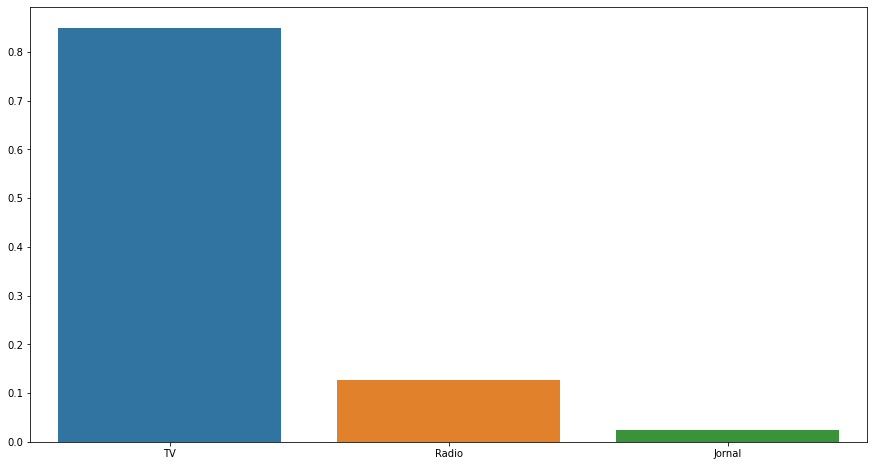

In [15]:
# importancia_features = pd.DataFrame(rf_reg.feature_importances_, x_train.columns)
plt.figure(figsize=(15, 8))
sns.barplot(x=x_train.columns, y=rf_reg.feature_importances_)
plt.show()

# colocamos no eixo x as colunas que foram usadas pro treino
# em y usamos um metodo do modelo random forest regressor que mostra a relevancia de cada coluna pro modelo

#### Será que estamos investindo certo?

In [80]:
print(df[["TV", "Radio", "Jornal"]].sum())


TV        29408.5
Radio      4652.8
Jornal     6110.8
dtype: float64


Podemos ver pelo gráfico que a relevancia do insvestimento em TV é muito maior.
Mas usando o método sum() do pandas observamos que a proporção do investimento em radio e jornal em relação a TV é maior que a proporção da sua relevância, logo o insvestimento está sendo equivocado.